# <div class="alert alert-info" role="alert"> <center> Python 2 : Programmes ressources

## <center>Présentation<center>  
Le but de l'atelier Python 2 est de construire des programmes dans un contexte de Physique-Chimie. Nous mettons à votre disposition une serie de petits programmes ressources simples :
    
- 1) structures conditionnelles ;
- 2) boucle for ;
- 3) tracer un histogramme ;
- 4) nuage de points ;
- 5) régression linéaire ;
- 6) tracer le graphique d'un modèle dont on connait l'expression ;
- 7) tracer un vecteur ;
- 8) boucle while ;
- 9) lecture d'un fichier .csv ;
- 10) définir une fonction ;  

Ce seront les briques qui vous permettront de construire, au cours de cet atelier, des programmes plus complexes.

## 1) Structures conditionnelles : if... elif... else...
***Contexte :*** Le son se propage dans l’air à la vitesse de 340 m.s<sup>-1</sup>. L’utilisateur peut calculer la distance parcourue à partir d’une durée **ou** la durée du parcourt à partir d’une distance.  
.  
***Instructions notamment rencontrées :***  
- print(), input(): fonction native pour afficher et/ou attendre la saisie d'une valeur  
- int(), float() : fonction native qui attribue un type à une variable (entier, virgule flottante)  
- **if... :** , **elif... :** , **else... :** : instructions natives de la structure conditionnelle  


In [1]:
# Initialisation des variables
vitesse=340
reponse=''

# Question posée
reponse=int(input('Calcul de distance ou de durée ?\n  - distance taper 1.\n  - durée taper 2.\n  Votre choix ?  '))

# Structure conditionnelle
if reponse==1 :
    duree=float(input('Quelle est la durée en s ?  '))
    distance=vitesse*duree
    print('La distance parcourue est : ',distance,' m')
elif reponse==2 :
    distance=float(input('Quelle est la distance en m ?  '))
    duree=distance/vitesse
    print('La durée de propagation est : ',duree, ' s')
else :
    print('Cette réponse ne fait pas partie des choix')

Calcul de distance ou de durée ?
  - distance taper 1.
  - durée taper 2.
  Votre choix ?  1
Quelle est la durée en s ?  3
La distance parcourue est :  1020.0  m


## 2) Boucle for
***Contexte :*** plusieurs groupes de TP mesurent l'absorbance d'une solution de permanganate de potassium de concentration c = 0,25 mmol.L<sup>-1</sup>  
.  
***Bibliothèque utilisée :*** 
- numpy  pour les fonctions mathématiques  

***Instructions notamment rencontrées :*** 
- len(): fonction native qui donne la longueur d'une liste
- range(): fonction native qui génére une liste d'entier
- sqrt(): fonction de numpy qui calcule la racine carrée
- **for ... in ... :** : instruction native de boucle *Pour... dans... faire* ce qui est "indenté"

In [2]:
import numpy as np

# initialisation des variables
somme=0
ecart=0

# La série de mesures
x=[0.6705,0.6724,0.6572,0.6589,0.6563,0.6550,0.6707,0.6700,0.6550,0.6625,0.6690]     # Les mesures sont dans une liste
N=len(x)                        # Calcule le nombre de valeur de la liste

# Boucle for (ne pas oublier le :)
for i in range(0,N):            # range crée une liste de N valeurs entières entre 0 et N-1
    somme = somme + x[i]            # à chaque passage, on ajoute x[i] dans la variable somme

moyenne=somme/N                         # une fois la boucle terminée, on calcule de la moyenne

# Boucle for
for i in range(0,N):                # range crée une liste de N valeurs entières entre 0 et N-1
    ecart +=  (x[i]-moyenne)**2      # "ecart+=(x[i]-moyenne)**2" est équivalent à "ecart=ecart+(x[i]-moyenne)**2"

ecart_type=np.sqrt(ecart/(N-1))         # une fois la boucle terminée, on calcule l'écart type N-1
incertitude=ecart_type/np.sqrt(N)       # Calcule l'incertitude sur la moyenne

# Affichage des résultats
print('La série de mesures est:')
print(x)
print("L'incertitude sur chaque mesure est : s_n-1(x) = ",ecart_type)
print('La moyenne des mesures est : x_moy = ',moyenne)
print('L\'incertitude sur la moyenne est : u(x) = ',incertitude)

La série de mesures est:
[0.6705, 0.6724, 0.6572, 0.6589, 0.6563, 0.655, 0.6707, 0.67, 0.655, 0.6625, 0.669]
L'incertitude sur chaque mesure est : s_n-1(x) =  0.0071459715288342
La moyenne des mesures est : x_moy =  0.6634090909090908
L'incertitude sur la moyenne est : u(x) =  0.0021545914839732165


## 3) Tracer un histogramme
***Contexte :*** plusieurs groupes de TP mesurent l'absorbance d'une solution de permanganate de potassium de concentration c = 0,25 mmol.L<sup>-1</sup>  
.  
***Bibliothèques utilisées :*** 
- numpy pour la fonction **linespace()**
- matplotlib.pyplot pour les fonctions graphiques  

***Instructions notamment rencontrées :*** 
- max(), min(): fonctions natives qui donnent les maximum et minimum d'une liste
- linspace(): fonction de numpy qui génére une liste à intervalles constants
- clf() : fonction de matplotlib.pyplot qui efface la fenètre graphique qui pourrait contenir un graphique précédemment tracé
- hist(), show() : fonctions de matplotlib.pyplot qui tracent un histogramme et affiche le résultat

L'amplitude de la série est :  0.01739999999999997
Le pas de l'histogramme :  0.0034799999999999944
Les bornes des pas sont :  [0.65326 0.65674 0.66022 0.6637  0.66718 0.67066 0.67414]
Les étiquettes des pas sont :  [0.655   0.65848 0.66196 0.66544 0.66892 0.6724 ]


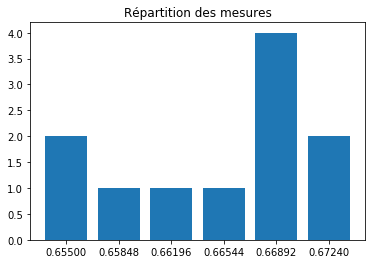

In [4]:
from matplotlib import pyplot as plt
import numpy as np

# La série de mesures
x=[0.6705,0.6724,0.6672,0.6589,0.6563,0.6650,0.6707,0.6700,0.6550,0.6625,0.6690]    # Les mesures sont dans une liste

# Calcul du histogramme
nb=6 # définit le nombre d'intervalle de l'histogramme (peut être changé pour s'adapter à la série de mesure)
amplitude=max(x)-min(x)         # Calcule l'amplitude de la série
print("L'amplitude de la série est : ", amplitude)
pas=amplitude/(nb-1)            # Calcule l'écart entre deux intervelles de l'histogramme
print("Le pas de l'histogramme : ",pas)
inter=np.linspace(min(x)-(pas/2),max(x)+(pas/2),nb+1) # Génère la liste des nb+1 bornes d'intervalles
print("Les bornes des pas sont : ",inter)
etiq=np.linspace(min(x),max(x),nb)          # Génère la liste des nb étiquettes
print("Les étiquettes des pas sont : ",etiq)

# Tracé du graphique histogramme
plt.clf()                                   # Efface le graphique précédent
plt.hist(x,bins=inter,rwidth=0.8)           # trace l'histogramme des mesures
                                            # bins = liste des bornes des intervalles
                                            # rwidth = largeur des barres
# Informations sur le graphique
plt.xticks(etiq)                            # Affiche les nombres étiquettes sur l'axe des abscisses
plt.title('Répartition des mesures')

# Montrer le graphique
plt.show()

## 4) Nuage de points
***Contexte :*** On a les coordonnées (x,y) d'un mobile, lancé dans le champ de pesanteur, en fonction du temps et on veut tracer différents graphiques  
.  
***Bibliothèque utilisée :*** 
- matplotlib.pyplot pour les fonctions graphiques  

***Instructions notamment rencontrées :*** 
- plot(), show() : fonction de matplotlib.pyplot qui trace un nuage de point et affiche le résultat

### Exemple 1 : Tracer la trajectoire

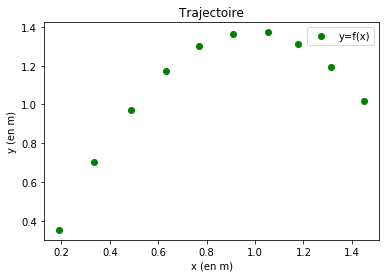

In [5]:
from matplotlib import pyplot as plt

# Les deux séries de valeurs sont dans des listes (le nombre de valeurs est identiques)
x=[0.1918, 0.3353, 0.4872, 0.6307, 0.7700, 0.9093, 1.0528, 1.1794, 1.3144, 1.4495]
y= [0.3526, 0.7025, 0.9723, 1.1704, 1.3011, 1.3643, 1.3727, 1.3137, 1.1957, 1.0186]

# Tracer le graphique de la trajectoire
plt.clf()                                   # Efface le graphique précédent
plt.plot(x,y,'go',label='y=f(x)')   # trace les points correspondant aux listes x et y avec légende "y=f(x)"

# Informations sur le graphique
plt.title('Trajectoire')    #Titre du graphique
plt.xlabel('x (en m)')           # légende de l'axe des abscisses
plt.ylabel('y (en m)')           # légende de l'axe des ordonnées
plt.legend()                    # Affiche la légende dans le graphique

# Montrer le graphique
plt.show()



### Exemple 2 : Tracer les équations horaires

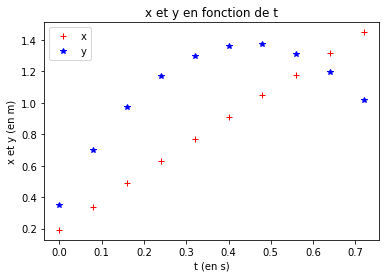

In [6]:
from matplotlib import pyplot as plt

# Les trois séries de valeurs sont dans des listes (le nombre de valeurs est identiques)
t=[0,0.08,0.16,0.24,0.32,0.4,0.48,0.56,0.64,0.72]
x=[0.1918, 0.3353, 0.4872, 0.6307, 0.7700, 0.9093, 1.0528, 1.1794, 1.3144, 1.4495]
y= [0.3526, 0.7025, 0.9723, 1.1704, 1.3011, 1.3643, 1.3727, 1.3137, 1.1957, 1.0186]

# Tracer le graphique des équations horaires
plt.clf()                                   # Efface le graphique précédent
plt.plot(t,x,'r+',t,y,'b*')             # trace les points correspondant aux listes t et x

# Informations sur le graphique
plt.title('x et y en fonction de t')    #Titre du graphique
plt.xlabel('t (en s)')           # légende de l'axe des abscisses
plt.ylabel('x et y (en m)')         # légende de l'axe des ordonnées
plt.legend(('x','y'))           # Légende dans le graphique

# Montrer le graphique
plt.show()

### Exemple 3 : Tracer les deux graphiques dans une même fenêtre

<Figure size 432x288 with 0 Axes>

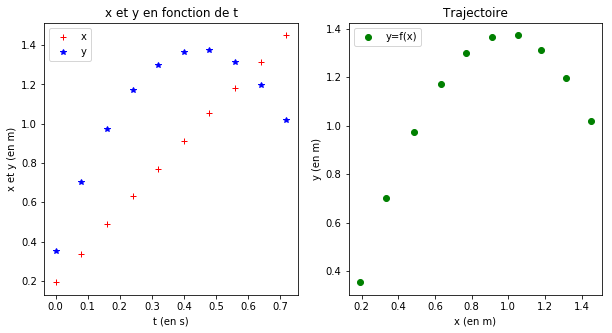

In [7]:
from matplotlib import pyplot as plt

# Les trois séries de valeurs sont dans des listes (le nombre de valeurs est identiques)
t=[0,0.08,0.16,0.24,0.32,0.4,0.48,0.56,0.64,0.72]
x=[0.1918, 0.3353, 0.4872, 0.6307, 0.7700, 0.9093, 1.0528, 1.1794, 1.3144, 1.4495]
y= [0.3526, 0.7025, 0.9723, 1.1704, 1.3011, 1.3643, 1.3727, 1.3137, 1.1957, 1.0186]

# Tracer les graphiques
plt.clf()                                   # Efface le graphique précédent
plt.figure(figsize=(10,5))                  # Permet d'élargir la largeur de la fen^tre graphique (par défaut (6.5,4.7))

# sous graphique 1 : équations horaires
plt.subplot(121)          # fenêtre graphique : 1 ligne, 2 colonnes ; graphique 1 (à gauche)
plt.plot(t,x,'r+',t,y,'b*')             # trace les points correspondant aux listes t et x

# Informations sur le sous-graphique 1
plt.title('x et y en fonction de t')    #Titre du graphique
plt.xlabel('t (en s)')           # légende de l'axe des abscisses
plt.ylabel('x et y (en m)')         # légende de l'axe des ordonnées
plt.legend(('x','y'))           # Légende dans le graphique

# sous graphique 2 : trajectoire
plt.subplot(122)          # fenêtre graphique : 1 ligne, 2 colonnes ; graphique 2 (à droite)
plt.plot(x,y,'go',label='y=f(x)')   # trace les points correspondant aux listes t et x avec légende "y=f(x)"

# Informations sur le sous-graphique 2
plt.title('Trajectoire')    #Titre du graphique
plt.xlabel('x (en m)')           # légende de l'axe des abscisses
plt.ylabel('y (en m)')           # légende de l'axe des ordonnées
plt.legend()                    # Affiche la légende dans le graphique

# Montrer le graphique
plt.show()



## 5) Régression
***Contexte :*** On modélise les équations horaires et la trajectoire d'un mobile lancé dans le champ de pesanteur  
.  
**<center> Régression polynomiale <center>**  

***Bibliothèque utilisée :***  
- numpy pour la fonction polyfit  

***Instruction notamment rencontrée :*** 
- polyfit() : fonction de numpy qui génére une liste avec les coefficients du modèle (ordre de poids décroissant)

In [8]:
import numpy as np

# Les trois séries de valeurs
t=[0,0.08,0.16,0.24,0.32,0.4,0.48,0.56,0.64,0.72]
x=[0.1918, 0.3353, 0.4872, 0.6307, 0.7700, 0.9093, 1.0528, 1.1794, 1.3144, 1.4495]
y= [0.3526, 0.7025, 0.9723, 1.1704, 1.3011, 1.3643, 1.3727, 1.3137, 1.1957, 1.0186]

# détermination des coefficients      
m_x_t = np.polyfit(t,x,1)         # le dernier nombre donne le degré du polynôme
modele_y_t = np.polyfit(t,y,2)
modele_y_x = np.polyfit(x,y,2)

#Affichage des résultats
print('Modélisation de x=f(t) par une fonction affine : x = at+b')
print('  a =',m_x_t[0])
print('  b =',m_x_t[1])
print('Modélisation de y=f(t) par une fonction polynomiale : at²+bt+c')
print('  a =',modele_y_t[0])
print('  b =',modele_y_t[1])
print('  c =',modele_y_t[2])
print('Modélisation de y=f(x) par une fonction polynomiale : ax²+bx+c')
print('  a =',modele_y_x[0])
print('  b =',modele_y_x[1])
print('  c =',modele_y_x[2])

Modélisation de x=f(t) par une fonction affine : x = at+b
  a = 1.7454242424242419
  b = 0.20368727272727274
Modélisation de y=f(t) par une fonction polynomiale : at²+bt+c
  a = -5.062322443181821
  b = 4.540591856060607
  c = 0.3651445454545447
Modélisation de y=f(x) par une fonction polynomiale : ax²+bx+c
  a = -1.6301821531486005
  b = 3.2032075502515247
  c = -0.19790997272403166


## 6) Tracer le graphique d'un modèle dont on connait l'expression
***Contexte :*** On connait l'équation du modèle de la trajectoire d'un mobile et on veut la représenter  
.  
***Bibliothèques utilisées :*** 
- matplotlib.pyplot pour les fonctions graphiques  
- numpy pour linspace()  

***Instructions notamment rencontrées :*** 
- linspace(): fonction de numpy qui génére une liste à intervalles constants
- *list_2* =[... **for ... in** *list_1*] **:** : instruction native générant une *list_2* à partir d'une *list_1*

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Equation du modèle : y = ax² + bx + c
a = -1.63
b = 3.203
c = -0.198

# Bornes du modèle
x_min=0.1918
x_max=1.4495

# Abscisses et ordonnées du modèle
x_modele=np.linspace(x_min,x_max,100001)           # permet de créer une liste de 101 valeurs d'abscisses
y_modele=[a*i**2+b*i+c for i in x_modele]        # calcule l'ordonnée en appliquant le modèle  ai²+bi+c

# Tracer le graphique
plt.clf()                                   # Efface le graphique précédent
plt.plot(x_modele,y_modele)

# Informations sur le graphique
plt.title('Modèle de y en fonction de x') 
plt.xlabel('x (en m)')        # légende de l'axe des abscisses
plt.ylabel('y (en m)')        # légende de l'axe des ordonnées
plt.grid()
plt.axis('equal')
#plt.ylim(0)

# Montrer le graphique
plt.show()

## 7) Tracer un vecteur
***Contexte :*** Connaissant les coordonnées (x,y) d'un mobile, lancé dans le champ de pesanteur, en fonction du temps, on veut tracer des vecteurs déplacement, vitesse, variation de vitesse et accélération.    
.  
***Bibliothèque utilisée :*** 
- matplotlib.pyplot pour les fonctions graphiques  

***Instruction notamment rencontrée :*** 
- quiver() : fonction de matplotlib.pyplot qui trace le vecteur à partir des coordonnées du point d'application et du vecteur 

In [ ]:
from matplotlib import pyplot as plt

# coordonnées de M toutes les dt=0.040 s : M1, M2, M3...
dt=0.04
x=[0.1918, 0.2635, 0.3353, 0.4112, 0.4872, 0.5589, 0.6307, 0.6982, 0.7700, 0.8375, 0.9093, 0.9768, 1.0528, 1.1161, 1.1794, 1.2469, 1.3144, 1.3820, 1.4495, 1.5170, 1.5846, 1.6521, 1.7154, 1.7745]
y=[0.3526, 0.5381, 0.7025, 0.8458, 0.9723, 1.0776, 1.1704, 1.2420, 1.3011, 1.3390, 1.3643, 1.3769, 1.3727, 1.3474, 1.3137, 1.2631, 1.1957, 1.1156, 1.0186, 0.9006, 0.7741, 0.6308, 0.4707, 0.2978]

# Représentation de la trajectoire
plt.clf()                                   # Efface le graphique précédent
plt.plot(x,y,'ro')

# Représentation du vecteur déplacement M2M3
dx=x[2]-x[1]            # Calcule des coordonnées de M2M3
dy=y[2]-y[1]            # l'indice de la première valeur d'une liste est 0 - M1 (x[0],y[0])
plt.quiver(x[1],y[1],dx,dy,scale=1,units='xy')       # L'échelle (scale) de représentation est celle des axes

# Représentation du vecteur vitesse v11=M11M12/dt
vx=(x[11]-x[10])/dt            # Calcule des coordonnées de v11
vy=(y[11]-y[10])/dt
plt.quiver(x[10],y[10],vx,vy,scale=10)      # L'échelle de représentation est 1/10ème

# Représentation du vecteur variation de vitesse dv18=v19-v18
dvx=(((x[19]-x[18])/dt)-(x[18]-x[17])/dt)            # Calcule des coordonnées de dv18
dvy=(((y[19]-y[18])/dt)-(y[18]-y[17])/dt)
plt.quiver(x[17],y[17],dvx,dvy,scale=5,color='g',width=0.002)       # On peut ajuster l'épaisseur (width)

# Représentation du vecteur accélération a5 = dv5/dt
ax=(((x[6]-x[5])/dt)-(x[5]-x[4])/dt)/dt              # Calcule des coordonnées de a5
ay=(((y[6]-y[5])/dt)-(y[5]-y[4])/dt)/dt
plt.quiver(x[4],y[4],ax,ay,scale=50,color='c',width=0.005)

# Repère orthonormé
plt.axis('equal')

# Montrer le graphique
plt.show()

## 8) Boucle while
***Contexte :*** A partir des conditions initiales, on modélise la trajectoire d'un mobile lancé dans le champ de pesanteur pour trouver la position de l'impact avec le sol 

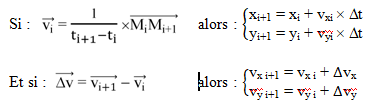

***Bibliothèque utilisée :*** 
- matplotlib.pyplot pour les fonctions graphiques  

***Instructions notamment rencontrées :*** 
- *list*.append(*variable*): fonction native qui ajoute la *variable* à la fin de la liste
- **while ... :** : instruction native de boucle *Tant que... faire* ce qui est "indenté"

In [ ]:
from matplotlib import pyplot as plt

# Définition des listes du modèle
x_modele=[]
y_modele=[]
vx_modele=[]
vy_modele=[]

# Données de contexte : un lancer de poids dans le champ de pesanteur
gx=0
gy=-9.81                    # vecteur champ de pesanteur
m=7.26                      # Masse  du mobile

# Conditions initiales du lancer
x0=0.31
y0=2.23                     # vecteur position initiale
v0x=10.056
v0y=9.377                   # vecteur vitesse initiale

# Pas du modèle
dt_modele=1/100000             # le pas du modèle est 1/10 000 de seconde

# Somme des forces extérieures
Fx=m*gx
Fy=m*gy                     # une seule force : le poids

# Modélisation au niveau spécialité première - force constante (somme F = m * delta v / delta t)
dvx=Fx/m*dt_modele
dvy=Fy/m*dt_modele              # Vecteur variation de vitesse du modèle (loi de Newton)

# Conditions initiales
x_modele.append(x0)
y_modele.append(y0)
vx_modele.append(v0x)
vy_modele.append(v0y)

# Calcul des coordonnées de la position et de la vitesse
i=0
while y_modele[i]>0 :
    x_modele.append((vx_modele[i]*dt_modele)+x_modele[i])   # modèle : x(i+1) = vx(i)*dt + x(i)
    y_modele.append((vy_modele[i]*dt_modele)+y_modele[i])   # modèle : y(i+1) = vy(i)*dt + y(i)
    vx_modele.append(vx_modele[i]+dvx)                      # modèle : vx(i+1) = vx(i) + dvx(i)
    vy_modele.append(vy_modele[i]+dvy)                      # modèle : vy(i+1) = vy(i) + dvy(i)
    i=i+1

# Affichage du point d'impact avec le sol
print('l\'abscisse du point de contact avec le sol est : ',x_modele[i],' m')

#Pour mieux comprendre ce qu'à fait le programme, on peut tracer la trajectoire
# Représentation de la trajectoire
plt.clf()                                   # Efface le graphique précédent
plt.plot(x0,y0,'ro')                                # Position initiale
plt.quiver(x0,y0,v0x,v0y,scale=50,width=0.005)      # Vecteur vitesse initiale
plt.plot(x_modele,y_modele,'g-')                    # Trajectoire d'après le modèle

# Configuration repère
plt.xlabel('Abscisse x (en m)')
plt.ylabel('Ordonnée y (en m)')
plt.grid()
plt.axis('equal')
plt.legend(['position initiale','modele'])

# Montrer le graphique
plt.show()

## 9) Lire un fichier .csv
***Contexte :*** Les coordonnées (t,x,y) d'un mobile sont sauvagardés dans un fichier au format '.csv' .
Il s'agit de lire le fichier pour placer les valeurs dans trois listes séparées : t, x et y  
**<center>Le fichier '.csv' lu avec le bloc note<center>**

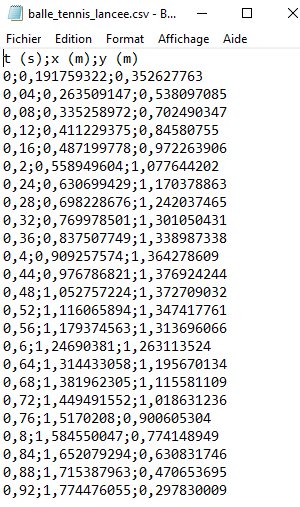

***Instructions notamment rencontrées :*** 
- *liste*.append(*variable*): fonction native qui ajoute la *variable* à la fin de la *liste*
- **with open(** *fichier* **,'r') as** *variable* : instruction native qui ouvre *fichier*, lit le texte du fichier et le place dans une *variable* 

In [ ]:
# Définition des listes
t=[]     
x=[]     
y=[]

# Lecture d'un fichier csv pour en faire une liste 
                # le ficher csv est dans le même dossier que le programme
                # la première ligne du fichier contient les intitulés de chaque colonne ; ici "t (s);x (m);y (m)"
                # de la deuxième à la dernière ligne, on trouve les valeurs des grandeurs séparés par des ;
                # le contenu des lignes est considéré comme du texte
with open('balle_tennis_lancee.csv','r') as fichier:        # le contenu du csv est placé dans fichier
    fichier.readline()              # on lit la première ligne de fichier (intitulés non utilisés)
    for ligne in fichier:               # a chaque passage, ligne prend la valeur de la nouvelle ligne de fichier
        ligne_lue=ligne.split(';')      # ligne_lue est une liste des valeurs de la variable ligne séparées par ';'
        t.append(float(ligne_lue[0].replace(',','.')))  # append signifie qu'on ajoute à la liste t
        x.append(float(ligne_lue[1].replace(',','.')))  # replace change la "," par un "."
        y.append(float(ligne_lue[2].replace(',','.')))  # float transforme la chaine de caractère en nombre

# Affichage des listes
print('premières valeurs des lignes: t = ',t)
print('deuxièmes valeurs des lignes: x = ',x)
print('troisièmes valeurs des lignes: y = ',y)

## 10) Définir une fonction  
## <center>Exemple 1
***Contexte :*** plusieurs groupes de TP mesurent l'absorbance d'une solution de permanganate de potassium de concentration c = 0,25 mmol.L<sup>-1</sup>  
On veut définir une fonction qui va retourner la valeur moyenne et l'évaluation de type A de l'incertitude-type

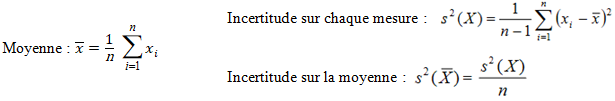

***Bibliothèque utilisée :*** 
- numpy pour la fonction sqrt()  

***Instructions notamment rencontrées :*** 
- **def** *nom_fonction* **:** : instruction native definisant une fonction par ce qui est "indenté". La fin d'indentation est signalée par **return** *résultat1,résultat2,...*

In [ ]:
import numpy as np

# Retourne la valeur moyenne d'une liste x de mesure et son incertitude-type A
def moy_incert(x):
    somme=0
    ecart=0
    N=len(x)                            # Calcule le nombre de valeur de la liste
    for i in range(0,N):                # boucle de calcul de la somme des valeurs
        somme+=x[i]
    moyenne=somme/N                     # Calcule la moyenne (on peut utiliser la fonction np.mean(x))
    for i in range(0,N):                # Boucle de calcul de la somme des carrés des écarts
        ecart += (x[i]-moyenne)**2
    ecart_type=np.sqrt(ecart/(N-1))     # Calcule l'écart type N-1 (on peut aussi utiliser la fonction np.std(x,ddof=1))
    incertitude=ecart_type/np.sqrt(N)   # Calcule l'incertitude sur la moyenne 
    return moyenne,incertitude          # Renvoie des parametres
    
# La série de mesures
raoul=[0.1095,0.1075,0.1020,0.1030,0.1010,0.1000,0.096,0.095,0.090,0.0925,0.0990]     # Les mesures sont dans une liste


# Utilisation de la fonction définie précédemment
raymond,raymonde=moy_incert(raoul)

# Affichage des résultats
print('La moyenne des mesures est : x_moy = ',raymond)
print('L\'incertitude sur la moyenne est : u(x) = ',raymonde)


## <center> Exemple 2
***Contexte :*** On connait une grandeur et son incertitude type. On veut définir une fonction qui, par tirage, retourne une valeur aléatoire (loi normale).

***Bibliothèque utilisée :*** 
- numpy pour la fonction sqrt() 
- matplotlib.pyplot pour les fonctions graphiques  

***Instructions notamment rencontrées :***  

- mean() : fonction de numpy qui calcule la moyenne
- std(,ddof=1) : fonction de numpy qui calcule l'écart-type expérimentale s<sub>n-1</sub>.
- **def** *nom_fonction* **. :** : instruction native definisant une fonction par ce qui est "indenté". La fin d'indentation est signalée par **return** *résultat1,résultat2,...*

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# La fonction alea retourne une valeur aléatoire (loi normale) de valeur x[0] et d'incertitude type x[1]
def alea(x):
    tirage = np.random.normal()
    return x[0] + x[1]*tirage

# On en prélève un volume V = 10,00 mL avec une incertitude type u(V)=+- 0,02 mL
V=[10,0.02]

# Par tirage, on peut proposer une valeur possible du volume 
V_valeur=alea(V)
print('Par un tirage aléatoire, on peut déterminer une valeur possible pour le volume : V = ',V_valeur,'mL')

# Par tirages multiples, on peut proposer plusieurs valeurs possibles
V_valeurs=[]
for i in range(0,100000):
    V_valeurs.append(alea(V))

# Calcul de la moyenne
moyenne=np.mean(V_valeurs)              # mean() est une fonction qui calcule la moyenne d'une liste
print('L\'histogramme est centré sur la valeur moyenne des tirages : ',moyenne,' ml')

# Calcul de l'écart-type (divisé par racine de n-1)
ecart_type=np.std(V_valeurs,ddof=1)             # std( ,ddof=1) est une fonction qui calcule s_n-1
print('L\'écart-type calculé sur les 100 000 tirages est : ',ecart_type,' ml')

# Affichage de l'histogramme
plt.clf()                                   # Efface le graphique précédent
plt.figure('Tirages multiples des volumes')
plt.hist(V_valeurs,bins =50,color ='green',edgecolor ='black')
plt.show()

## <center>Exemple 3
**<center>Une fonction qui pourrait vous être utile...**  
***Contexte :*** On a une série de mesure dont le graphique suggère une droite qui passe par l'origine. On veut définir une fonction qui renvoie la pente de la droite et le coefficient de corrélation.
    
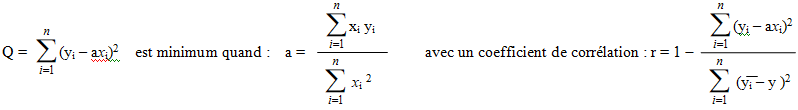
***Bibliothèque utilisée :*** 
- Aucune pour la fonction  

***Instructions notamment rencontrées :*** 
- **def** *nom_fonction* **:.** : instruction native definisant une fonction par ce qui est "indenté". La fin d'indentation est signalée par **return** *résultat1,résultat2,...*

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Les deux séries de valeurs
x=[1,2,3,4,5]           # Les abscisses et les ordonnées sont dans des listes
y=[1.5,3,4.2,6.3,7.5]   # le nombre de valeurs dans les listes est identique

# définition d'une fonction
def reglin(x, ro):
    # Ajuste une droite d'équation a*x sur les points (x, y) par la méthode des moindres carrés.
    # Return a,ro (float): pente de la droite passant par l'origine, coefficient de corélation
       
    # initialisation des sommes
    x2_sum = 0.
    xy_sum = 0.
    y_sum = 0
    
    # calcul des sommes
    for xi, yi in zip(x, y):    # zip combine plusieurs listes, chacune faisant son itération
        x2_sum += xi**2
        xy_sum += xi * yi
        y_sum += yi
        
    N = len(y)
    y_moy=y_sum/N           # Calcul de la moyenne des y
    a = xy_sum/x2_sum       # calcul de la pente

    # calcul du coefficient de corélation ro
    ecart_modele=0
    ecart_moy=0
    for xi, yi in zip(x, y):
        ecart_modele += (yi-a*xi)**2
        ecart_moy += (yi-y_moy)**2
    ro=1-(ecart_modele/ecart_moy)
    
    # renvoi des parametres et fin de la définition de la fonction
    return a,ro

# détermination des coefficients en utilisant la fonction définie ci-dessus     
a,ro=reglin(x,y)

#Affichage des résultats
print('Coefficient directeur : a =',a)
print('Coefficient de corélation : r = ',ro)

#Pour mieux comprendre ce qu'à fait le programme, on peut tracer le graphique ci-dessous

# Abscisses et ordonnées du modèle
x_modele=np.linspace(0,max(x),101)     # permet de créer une liste de 101 valeurs d'abscisses
y_modele=[a*i for i in x_modele]          # calcule l'ordonnée en appliquant le modèle

# Tracer le graphique
plt.clf()                                   # Efface le graphique précédent
plt.plot(x,y,'r+')              # les couples de valeur sont représentés par des croix rouges
plt.plot(x_modele,y_modele)     # par défaut les points sont liés par un segment de droite bleu

# Informations sur le graphique
plt.title('y en fonction de x') 
plt.xlabel('Liste x')        # légende de l'axe des abscisses
plt.ylabel('liste y')        # légende de l'axe des ordonnées
plt.legend(('y','modèle'))

# Montrer le graphique
plt.show()